In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Extracted data.csv',index_col='Unnamed: 0')

In [3]:
df.head(n=15)

,Drug,Age,Sex,Condition,Sides
0,25dph-7.5peh,75 or over,Male,Stuffy Nose,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25dph-7.5peh,25-34,Female,Cold Symptoms,"Drowsiness, dizziness , dry mouth /nose/thro..."
6,wymzya fe,25-34,Female,Birth Control,"Nausea , vomiting , headache , bloating , ..."
7,wymzya fe,45-54,Female,Disease of Ovaries with Cysts,"Nausea , vomiting , headache , bloating , ..."
8,wymzya fe,25-34,Female,Acne,"Nausea , vomiting , headache , bloating , ..."
9,"12 hour nasal relief spray, non-aerosol",55-64,Male,Stuffy Nose,"Temporary burning, stinging, dryness in the no..."
13,lyza,19-24,Female,Birth Control,"Nausea , vomiting , headache , bloating , ..."
16,lyza,25-34,Female,Birth Control,"Nausea , vomiting , headache , bloating , ..."
18,lyza,25-34,Female,Birth Control,"Nausea , vomiting , headache , bloating , ..."
19,lyza,25-34,Female,Birth Control,"Nausea , vomiting , headache , bloating , ..."


### Handling Missing Value

As I drop missing value rows in previous 'Data extration Notebook',so in this notebook it is not important.

### Encoding Variable

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
Col=['Drug','Age','Sex','Condition','Sides']
le = LabelEncoder()
df[Col] = df[Col].apply(le.fit_transform)

In [6]:
df.head(n=15)

,Drug,Age,Sex,Condition,Sides
0,4,10,1,1456,403
1,4,3,0,394,403
6,5103,3,0,222,1028
7,5103,6,0,515,1028
8,5103,3,0,51,1028
9,1,7,1,1456,1478
13,2810,2,0,222,1027
16,2810,3,0,222,1027
18,2810,3,0,222,1027
19,2810,3,0,222,1027


In [7]:
X=df[['Drug','Age','Sex','Condition']]

In [8]:
y=df['Sides']

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Importing performance evaluation Library

In [10]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

# K-Neareast Neighbour Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Apply elbow method to pick a good K Value:

In [12]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

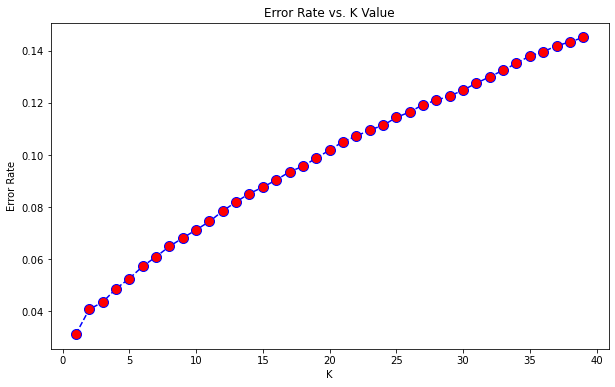

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from above plot we clearly see that as K value goes increase, error rate also increas. lets take k value from 1 to 5 

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[ 2  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 22]]


0.9687374580173634


In [15]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=2


[[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 20]]


0.9592425170570964


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=3


[[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 20]]


0.9565387296423818


In [17]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=4


[[ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 18]]


0.9513529498743162


In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=5


[[ 2  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 18]]


0.9474345704568978


From all the above result,we clearly see that as k value increases,then the accuracy is start decreaseing.

# Decision Tree Classification

Normal decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [20]:
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))



[[ 4  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 22]]


0.9854671426459095


Decision tree with entropy critersion

In [21]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))



[[ 4  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 24]]


0.9931243530977377


# Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))



[[ 3  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 18]]


0.950307344585032
